In [12]:
# Run this in a notebook cell

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

symbols = ['VUTY.MI', 'VWCE.DE', 'EUNW.DE']
    

In [15]:
data = pd.DataFrame()
for symbol in symbols:
    asset_data=yf.download(symbol, start='2020-01-01', end='2024-06-28')
    data[symbol]=asset_data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
data

,VUTY.MI,VWCE.DE,EUNW.DE
Date,,,
2020-01-02,19.708227,77.400002,84.708870
2020-01-03,19.809296,77.349998,84.612892
2020-01-06,19.774147,77.099998,84.480965
2020-01-07,19.857637,77.589996,84.532944
2020-01-08,19.884001,77.800003,84.500946
...,...,...,...
2024-06-21,19.673853,122.699997,89.448265
2024-06-24,19.586285,122.879997,89.671371
2024-06-25,19.644663,122.720001,89.661667


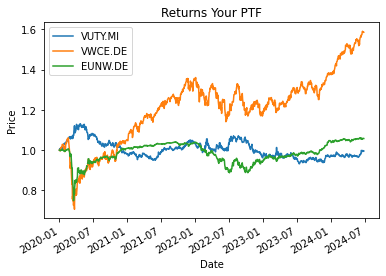

In [17]:
normalized_data=data/data.iloc[0]
normalized_data.plot()

plt.title('Returns Your PTF')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [18]:
returns=data.pct_change().dropna()

In [19]:
returns

,VUTY.MI,VWCE.DE,EUNW.DE
Date,,,
2020-01-03,0.005128,-0.000646,-0.001133
2020-01-06,-0.001774,-0.003232,-0.001559
2020-01-07,0.004222,0.006355,0.000615
2020-01-08,0.001328,0.002707,-0.000379
2020-01-09,-0.002431,0.007712,0.002177
...,...,...,...
2024-06-21,0.003474,-0.002925,-0.001105
2024-06-24,-0.004451,0.001467,0.002494
2024-06-25,0.002981,-0.001302,-0.000108


In [20]:
mean_returns= returns.mean()

In [21]:
mean_returns

VUTY.MI    0.000010
VWCE.DE    0.000461
EUNW.DE    0.000066
dtype: float64

In [22]:
cov_matrix=returns.cov()
print(cov_matrix)

          VUTY.MI   VWCE.DE   EUNW.DE
VUTY.MI  0.000028 -0.000010 -0.000007
VWCE.DE -0.000010  0.000116  0.000044
EUNW.DE -0.000007  0.000044  0.000033


In [23]:
num_portfolios=10000
weights_rd = np.random.random((num_portfolios,len(symbols)))
weights_rd /= weights_rd.sum(axis=1,keepdims=True)

In [24]:
portfolio_returns=np.dot(weights_rd,mean_returns)*252
portfolio_std_devs=np.sqrt(np.einsum('ij,ji->i',weights_rd.dot(cov_matrix),weights_rd.T)*252)

In [26]:
current_weights = np.array([0.40, 0.40, 0.2])
current_ptf_return=np.dot(current_weights,mean_returns)*252
current_ptf_return
current_ptf_std_dev = np.sqrt(np.dot(current_weights.T, np.dot(cov_matrix, current_weights))) * np.sqrt(252)

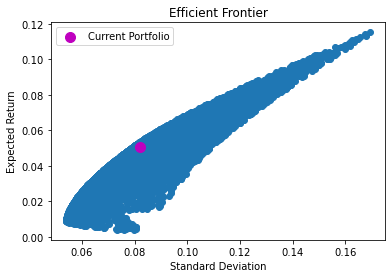

In [27]:
plt.scatter(portfolio_std_devs, portfolio_returns, cmap='viridis')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Plot current portfolio allocation
plt.scatter(current_ptf_std_dev, current_ptf_return, marker='o', color='m', s=100, label='Current Portfolio')

plt.legend()
plt.show()

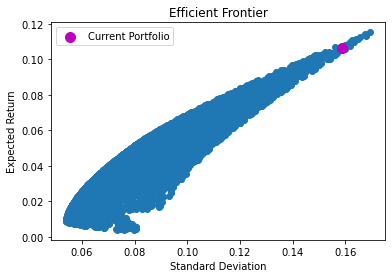

In [31]:
#PLEASE FEEL FREE TO CHANGE WEIGHTS

current_weights_CHANGE = np.array([0.1, 0.9, 0.1])
current_ptf_return=np.dot(current_weights_CHANGE,mean_returns)*252
current_ptf_return
current_ptf_std_dev = np.sqrt(np.dot(current_weights_CHANGE.T, np.dot(cov_matrix, current_weights_CHANGE))) * np.sqrt(252)

plt.scatter(portfolio_std_devs, portfolio_returns, cmap='viridis')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Plot current portfolio allocation
plt.scatter(current_ptf_std_dev, current_ptf_return, marker='o', color='m', s=100, label='Current Portfolio')

plt.legend()
plt.show()